### Notebook to plot BOWTIE SeaSnake data.

Data is one-minute frequency.

James Ruppert
jruppert@ou.edu
8/29/24

### Main settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rc
import subprocess, cmocean
import pandas as pd
import xarray as xr
import seaborn as sns
from bowtie_read_data import *
from scipy import signal
from time_series_diag import *

#### Read data

In [2]:
# SeaSnake data
snakedat = read_bowtie_seasnake()
# DSHIP data
dship = read_bowtie_dship()
# ISAR skin SST
# isar_sst, times_isar = read_bowtie_ISAR_sst()

---
### Plotting routines

#### Plot functions

In [3]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

rc('font', **font)

sns.set_theme(style="darkgrid", rc={'xtick.bottom': True, 'ytick.left': True,})
# sns.set_theme(style="dark")

In [4]:
def do_smooth(invar, nt_smooth=10):
    invar_df = pd.DataFrame(invar)
    return invar_df.rolling(window=nt_smooth, center=True, closed='both', min_periods=3).mean()

In [5]:
def plot_time_series(figdata):

    fig_x = 8
    fig_y = 3.5
    fig, ax = plt.subplots(figsize=(fig_x,fig_y), layout="constrained",) # row, column

    ax.set_title(figdata['fig_title'])

    ax.set_ylabel(figdata['units_sst'])
    ax.set_xlabel('Date [UTC]')
    ax.set_xlim(figdata['xlim'])
    # ax.set_ylim((28,29.5))

    ax.grid(True, axis='x')#, color='0.55', linewidth=0.5)
    ax.grid(True, axis='y')#, color='0.55', linewidth=0.5)

    linewidth=1.5
    nsmooth=30 # Minutes
    sst = do_smooth(figdata['thermo_sst'], nt_smooth=nsmooth)
    ax.plot(figdata['time_dship'], sst, label='Thermosal-extern', color='#1f77b4', linewidth=linewidth)
    # sst = do_smooth(figdata['station_sst'], nt_smooth=nsmooth)
    # ax.plot(figdata['time_dship'], sst, label='Station', linewidth=linewidth)
    sst = do_smooth(figdata['snake_sst'], nt_smooth=nsmooth)
    ax.plot(figdata['time_snake'], sst, label='Snake', color='#ff7f50', linewidth=linewidth)
    # sst = do_smooth(figdata['snake_sst'], nt_smooth=nsmooth)
    # ax.plot(figdata['time_isar'], figdata['isar_sst'], label='ISAR', color='#2ca02c', linewidth=linewidth)

    ax2 = ax.twinx()
    # ax2.plot(figdata['time_dship'], figdata['snake_sst'] - figdata['thermo_sst'], label='Snake', linewidth=linewidth)
    linewidth=1
    wspd = do_smooth(figdata['wspd'], nt_smooth=nsmooth)
    ax2.plot(figdata['time_dship'], wspd, label='Wind speed', color='black', linewidth=linewidth, alpha=0.4, zorder=0)
    # ax2.plot(figdata['time_dship'], wspd_daily, label='24hAvg', color='black', linewidth=linewidth, alpha=1, zorder=0)
    ax2.set_ylabel(figdata['units_var2'])

    # ax2.plot(figdata['time_dship'], wspd - wspd_daily, label='Wind speed', color='red', linewidth=linewidth, alpha=0.4, zorder=0)

    ax.legend(fontsize=10, loc='upper left')#frameon=False)
    ax2.legend(fontsize=10, loc='upper right')#frameon=False)

    ax2.grid(visible=False)#, axis='x')

    # Time labels
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

    plt.show()
    plt.close()
    return

#### Power spectra

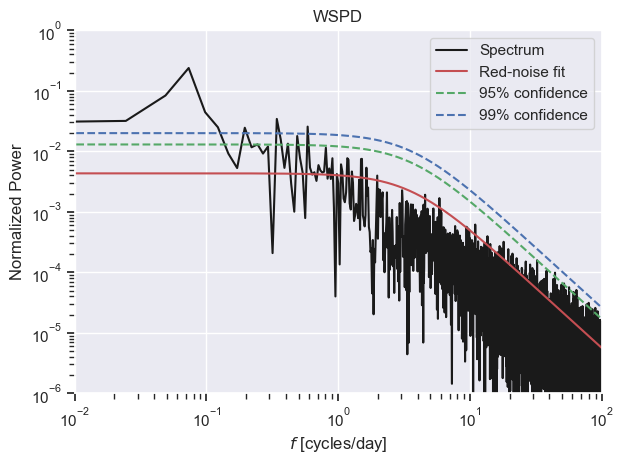

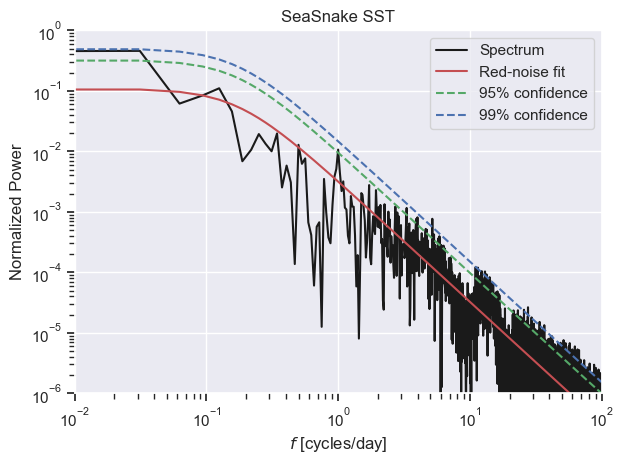

In [6]:
plot_power_spec(dship['wspd'], time_step=1/(24*60), title='WSPD')
plot_power_spec(np.array(snakedat[4]), time_step=1/(24*60), title='SeaSnake SST')

#### Time series

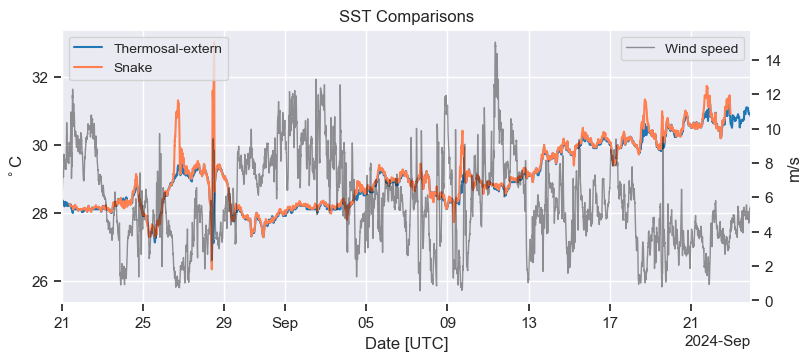

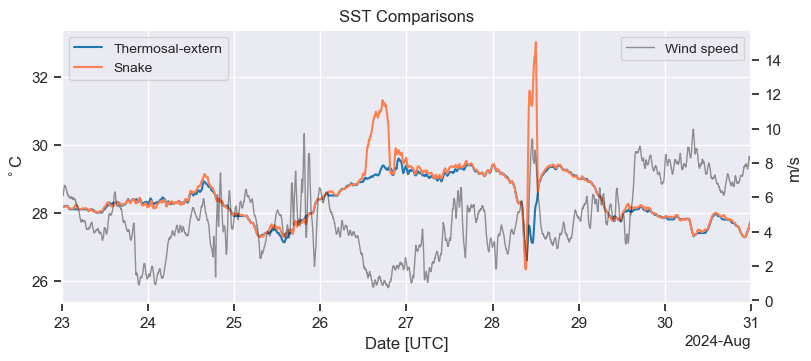

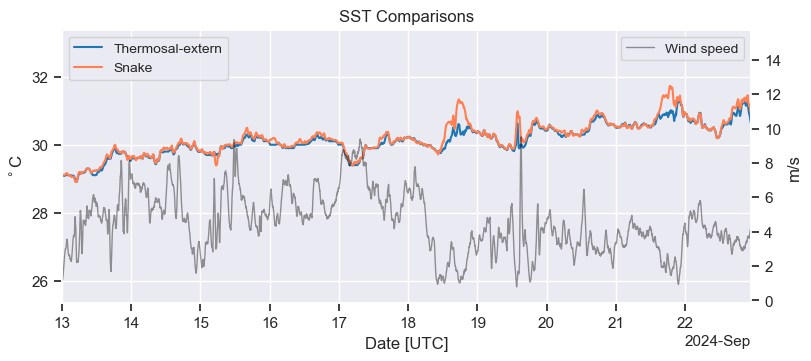

In [7]:
# xlim = (snakedat[0].iloc[0], snakedat[0].iloc[-1])
xlim = (np.datetime64('2024-08-21T00'), dship['time'][-1])
# xlim = (np.datetime64('2024-08-24T00'), snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-08-24T00'), np.datetime64('2024-08-27T12'))

figdata = {
    'fig_title': 'SST Comparisons',
    'snake_sst': snakedat[4],
    'time_snake': snakedat[0],
    # 'snake_sst': np.array(snakedat[4]) - daily_running_mean(np.array(snakedat[4]), np.array(snakedat[0])),
    # 'time_snake': np.array(snakedat[0]),
    # 'snake_sst': daily_running_mean(np.array(snakedat[4]), np.array(snakedat[0])),
    # 'time_snake': np.array(snakedat[0]),
    'units_sst': r'$^\circ$C',
    # 'station_sst': sst1-273.15,
    'thermo_sst': dship['sst1']-273.15,
    # 'thermo_sst': dship['sst1'] - daily_running_mean(dship['sst1'], np.array(dship['time'])),
    # 'thermo_sst': daily_running_mean(dship['sst1'], np.array(dship['time'])) - 273.15,
    'wspd': dship['wspd'],
    'units_var2': 'm/s',
    'time_dship': dship['time'],
    # 'isar_sst': isar_sst-273.15,
    # 'time_isar': times_isar,
    # 'units2': r'$^\circ$C',
    'xlim': xlim,
           }

plot_time_series(figdata)

# xlim = (np.datetime64('2024-09-03T00'), snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-09-10T00'), snakedat[0].iloc[-1])
xlim = (np.datetime64('2024-08-23T00'), np.datetime64('2024-08-31T00'))
# xlim = (np.datetime64('2024-09-01T00'), np.datetime64('2024-09-09T00'))
# xlim = (np.datetime64('2024-09-04T00'), np.datetime64('2024-09-09T00'))
# xlim = (np.datetime64('2024-09-13T00'), np.datetime64('2024-09-19T00'))
# xlim = (np.datetime64('2024-09-06T00'), np.datetime64('2024-09-12T00'))
figdata['xlim']=xlim
plot_time_series(figdata)

xlim = (np.datetime64('2024-09-13T00'), snakedat[0].iloc[-1])
figdata['xlim']=xlim
plot_time_series(figdata)

#### Daily-smoothing check

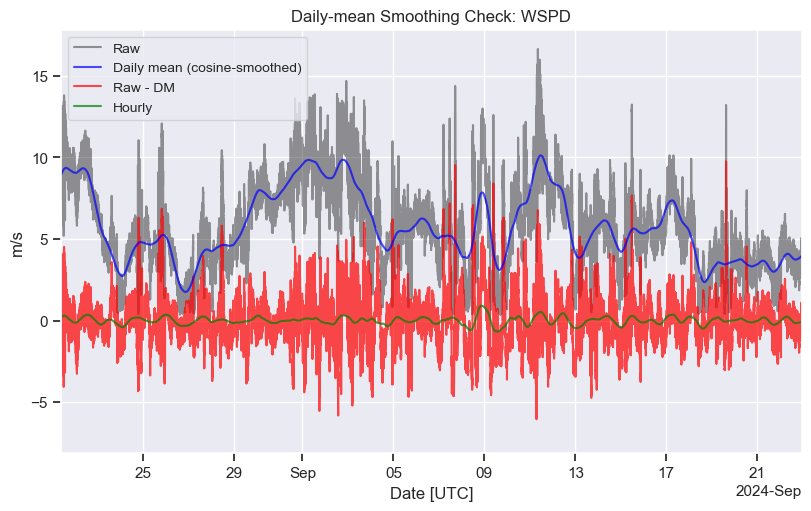

In [8]:
xlim = (snakedat[0].iloc[0], snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-08-24T00'), snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-08-24T00'), np.datetime64('2024-08-27T12'))

time = np.copy(dship['time'])

wspd0 = np.copy(dship['wspd'])

h24 = np.timedelta64(24, 'h').astype('timedelta64[ns]')
dt = (time[1] - time[0]).astype('timedelta64[ns]')
npd = int(np.round(h24 / dt))

hon1 = np.timedelta64(1, 'h').astype('timedelta64[ns]')
dt = (time[1] - time[0]).astype('timedelta64[ns]')
nphr = int(np.round(h24 / dt))

wspd_df = pd.DataFrame(wspd0)

# wspd1 = np.squeeze(wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2)).mean())
wspd2_df = wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2),
                                          win_type='cosine').mean()
wspd2 = np.squeeze(wspd2_df)
wspd3 = np.squeeze((wspd_df - wspd2_df).rolling(window=nphr, center=True, closed='both', min_periods=int(npd*0.2),
                                          win_type='cosine').mean())
# wspd3 = np.squeeze(wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2),
#                                           win_type='gaussian').mean(std=npd))
# wspd4 = np.squeeze(wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2),
#                                           win_type='exponential').mean())
# wspd5 = np.squeeze(wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2),
#                                           win_type='boxcar').mean())

########################################################

fig_x = 8
fig_y = 5
fig, ax = plt.subplots(figsize=(fig_x,fig_y), layout="constrained",) # row, column

ax.set_title('Daily-mean Smoothing Check: WSPD')

ax.set_ylabel('m/s')
ax.set_xlabel('Date [UTC]')
ax.set_xlim(xlim)

ax.grid(True, axis='x')#, color='0.55', linewidth=0.5)
ax.grid(True, axis='y')#, color='0.55', linewidth=0.5)

linewidth=1.5

ax.plot(time, wspd0, label='Raw', color='black', linewidth=linewidth, alpha=0.4, zorder=1)

# linewidth=1

# ax.plot(time, wspd1, label='Boxcar', color='red', linewidth=linewidth*2, alpha=0.7, zorder=2)
ax.plot(time, wspd2, label='Daily mean (cosine-smoothed)', color='blue', linewidth=linewidth, alpha=0.7, zorder=2)
ax.plot(time, wspd0-wspd2, label='Raw - DM', color='red', linewidth=linewidth, alpha=0.7, zorder=1)
ax.plot(time, wspd3, label='Hourly', color='green', linewidth=linewidth, alpha=0.7, zorder=1)
# ax.plot(time, wspd4, label='Exponential', color='green', linewidth=linewidth, alpha=1, zorder=3)
# ax.plot(time, wspd5, label='Boxcar2', color='green', linewidth=linewidth, alpha=1, zorder=3)

ax.legend(fontsize=10, loc='upper left')#frameon=False)

# Time labels
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.show()
plt.close()

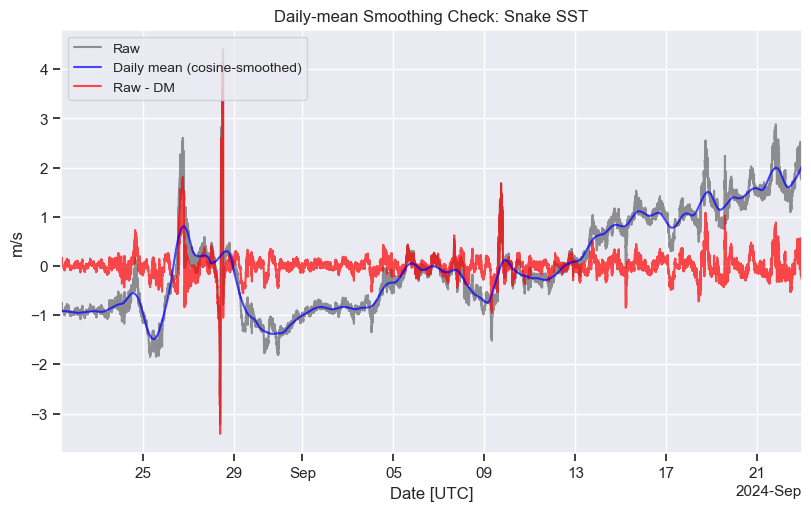

In [9]:
xlim = (snakedat[0].iloc[0], snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-08-24T00'), snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-08-24T00'), np.datetime64('2024-08-27T12'))

time = np.copy(snakedat[0])

sst0 = np.copy(snakedat[4])

h24 = np.timedelta64(24, 'h').astype('timedelta64[ns]')
dt = (time[1] - time[0]).astype('timedelta64[ns]')
npd = int(np.round(h24 / dt))

sst_df = pd.DataFrame(sst0)

sst2 = np.squeeze(sst_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2),
                                          win_type='cosine').mean())

########################################################

fig_x = 8
fig_y = 5
fig, ax = plt.subplots(figsize=(fig_x,fig_y), layout="constrained",) # row, column

ax.set_title('Daily-mean Smoothing Check: Snake SST')

ax.set_ylabel('m/s')
ax.set_xlabel('Date [UTC]')
ax.set_xlim(xlim)

ax.grid(True, axis='x')#, color='0.55', linewidth=0.5)
ax.grid(True, axis='y')#, color='0.55', linewidth=0.5)

linewidth=1.5

ax.plot(time, sst0 - np.nanmean(sst0), label='Raw', color='black', linewidth=linewidth, alpha=0.4, zorder=1)

# linewidth=1

ax.plot(time, sst2 - np.nanmean(sst0), label='Daily mean (cosine-smoothed)', color='blue', linewidth=linewidth, alpha=0.7, zorder=2)
ax.plot(time, sst0-sst2, label='Raw - DM', color='red', linewidth=linewidth, alpha=0.7, zorder=1)

ax.legend(fontsize=10, loc='upper left')#frameon=False)

# Time labels
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.show()
plt.close()

#### Test of different smoothing windows

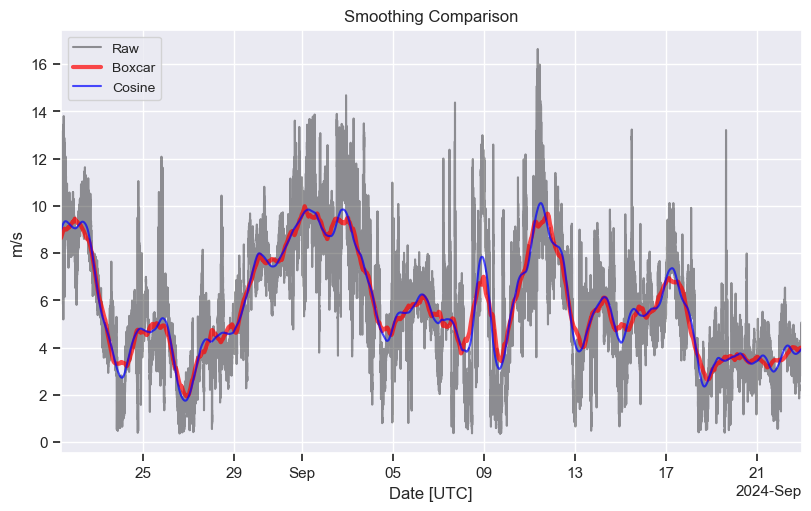

In [10]:
xlim = (snakedat[0].iloc[0], snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-08-24T00'), snakedat[0].iloc[-1])
# xlim = (np.datetime64('2024-08-24T00'), np.datetime64('2024-08-27T12'))

time = np.copy(dship['time'])

wspd0 = np.copy(dship['wspd'])

h24 = np.timedelta64(24, 'h').astype('timedelta64[ns]')
dt = (time[1] - time[0]).astype('timedelta64[ns]')
npd = int(np.round(h24 / dt))

wspd_df = pd.DataFrame(wspd0)

wspd1 = np.squeeze(wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2)).mean())
wspd2 = np.squeeze(wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2),
                                          win_type='cosine').mean())
# wspd3 = np.squeeze(wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2),
#                                           win_type='gaussian').mean(std=npd))
# wspd4 = np.squeeze(wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2),
#                                           win_type='exponential').mean())
wspd5 = np.squeeze(wspd_df.rolling(window=npd, center=True, closed='both', min_periods=int(npd*0.2),
                                          win_type='boxcar').mean())

########################################################

fig_x = 8
fig_y = 5
fig, ax = plt.subplots(figsize=(fig_x,fig_y), layout="constrained",) # row, column

ax.set_title('Smoothing Comparison')

ax.set_ylabel('m/s')
ax.set_xlabel('Date [UTC]')
ax.set_xlim(xlim)

ax.grid(True, axis='x')#, color='0.55', linewidth=0.5)
ax.grid(True, axis='y')#, color='0.55', linewidth=0.5)

linewidth=1.5

ax.plot(time, wspd0, label='Raw', color='black', linewidth=linewidth, alpha=0.4, zorder=1)

# linewidth=1

ax.plot(time, wspd1, label='Boxcar', color='red', linewidth=linewidth*2, alpha=0.7, zorder=2)
ax.plot(time, wspd2, label='Cosine', color='blue', linewidth=linewidth, alpha=0.7, zorder=2)
# ax.plot(time, wspd3, label='Gaussian', color='green', linewidth=linewidth, alpha=1, zorder=3)
# ax.plot(time, wspd4, label='Exponential', color='green', linewidth=linewidth, alpha=1, zorder=3)
# ax.plot(time, wspd5, label='Boxcar2', color='green', linewidth=linewidth, alpha=1, zorder=3)

ax.legend(fontsize=10, loc='upper left')#frameon=False)

# Time labels
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

plt.show()
plt.close()

### Diurnal composites

#### Plot and processing functions

In [11]:
def plot_diurnal_composite(figdata):

    def dc_smooth(invar, nt_smooth=10):
        # Copy ends to make smoothing periodic
        invar_long = np.concatenate((invar[-nt_smooth:], invar, invar[:nt_smooth]))
        invar_df = pd.DataFrame(invar_long)
        invar_smoothed = invar_df.rolling(window=nt_smooth, center=True, closed='both', min_periods=int(nt_smooth/2),
                                          win_type='cosine').mean()
        return np.squeeze(invar_smoothed[nt_smooth:-nt_smooth])

    fig_x = 8
    fig_y = 3.5
    fig, ax = plt.subplots(figsize=(fig_x,fig_y), layout="constrained",) # row, column

    ax.set_title(figdata['fig_title'])

    ax.set_xlabel('Hour [UTC]')
    plt.xticks(np.arange(0,49,6))

    xdim = np.arange(figdata['npd']*2+1)*24/figdata['npd']

    linewidth=1.
    alpha=1.
    color1='#ff7f50'
    # color2='#2ca02c'
    color2='#1f77b4'
    color3='black'

    ax.set_ylabel(figdata['units1'])
    nt_smooth = 30 # minutes
    ax.plot(xdim, figdata['pltvar1'], linewidth=linewidth, color=color1, label=figdata['label1'], alpha=alpha)
    # pvar1_sm = dc_smooth(figdata['pltvar1'], nt_smooth=nt_smooth)
    # ax.plot(xdim, pvar1_sm, linewidth=linewidth, color=color1, label=figdata['label1'], alpha=alpha)
    ax.plot(xdim, figdata['pltvar2'], linewidth=linewidth, color=color2, label=figdata['label2'], alpha=alpha)
    # pvar2_sm = dc_smooth(figdata['pltvar2'], nt_smooth=nt_smooth)
    # ax.plot(xdim, pvar2_sm, linewidth=linewidth, color=color2, label=figdata['label2'], alpha=alpha)
    ax.plot(xdim, figdata['pltvar3']*np.nan, linewidth=linewidth, color=color3, label=figdata['label3'], alpha=0.4)

    ax.grid(True, axis='x')
    ax.grid(True, axis='y')

    # Plot vertical line at new day
    ax.axvline(x=24, color='black', alpha=0.6)

    plt.legend()

    # Second axis

    ax2 = ax.twinx()
    ax2.set_ylabel(figdata['units3'])
    # pvar3_sm = dc_smooth(figdata['pltvar3'], nt_smooth=nt_smooth)
    # ax2.plot(xdim, pvar3_sm, linewidth=linewidth, color=color3, label=figdata['label3'], alpha=0.4)
    ax2.plot(xdim, figdata['pltvar3'], linewidth=linewidth, color=color3, label=figdata['label3'], alpha=0.4)

    ax2.grid(False, axis='x')
    ax2.grid(False, axis='y')

    plt.show()
    plt.close()
    return

#### Run plots

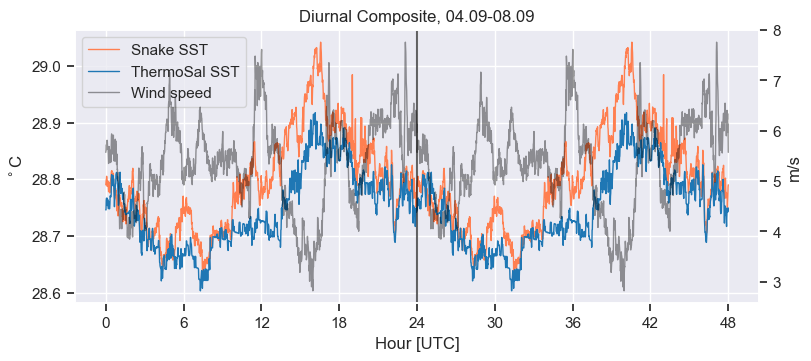

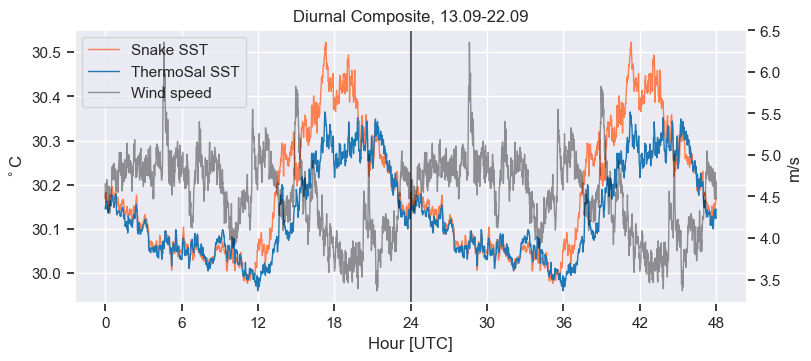

In [12]:
def run_plot():

    dt = np.timedelta64(1, 'm')
    h24 = np.timedelta64(24, 'h').astype('timedelta64[ns]')
    npd = int(np.round(h24 / dt))

    days = np.arange(t0, t1+h24, h24, dtype='datetime64[ns]')
    t0str = np.datetime_as_string(t0)
    t1str = np.datetime_as_string(t1)
    date_str = t0str[8:10]+'.'+t0str[5:7]+'-'+t1str[8:10]+'.'+t1str[5:7]

    figdata = {
        'fig_title': 'Diurnal Composite, '+date_str,
        'pltvar1': diurnal_composite(np.array(snakedat[4]), np.array(snakedat[0]), dt, days=days, anom=anom),
        'pltvar2': diurnal_composite(dship['sst1']-273.15, dship['time'], dt, days=days, anom=anom),
        # 'pltvar3': diurnal_composite(dship['wspd'], dship['time'], dt, days=days),
        'pltvar3': diurnal_composite(dship['wspd'], dship['time'], dt, days=days, anom=anom),
        'units1': r'$^\circ$C',
        'units2': r'$^\circ$C',
        'units3': 'm/s',
        'label1': 'Snake SST',
        'label2': 'ThermoSal SST',
        'label3': 'Wind speed',
        'npd': npd,
        }
    plot_diurnal_composite(figdata)
    return

anom=False
# anom=True

t0 = np.datetime64('2024-09-04T00:00')
t1 = np.datetime64('2024-09-08T00:00')

run_plot()

# t0 = np.datetime64('2024-09-01T00:00')
t0 = np.datetime64('2024-09-13T00:00')
t1 = np.datetime64('2024-09-22T00:00')
# t0 = np.datetime64('2024-09-04T00:00')
# t1 = np.datetime64('2024-09-08T00:00')
# t0 = np.datetime64('2024-09-18T00:00')
# t1 = np.datetime64('2024-09-22T00:00')

run_plot()